In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
import os
import string 

In [7]:
path = "../" 

#### Data Loading ($v_1 = 500$ and $v_1 = 800$ data) 

Some notes, 

In the $v_1 = 500$ model, we have $v_2$ ranging from 300 to 2000. We will only experiment with the cases $v_2 \ge v_1 - 30\% v_1$. 

The following cases are to be examined: 
1. $v_2 \ge v_1 - 30\% v_1$, so $v_2 \ge 350$ So the first index is at 10
2. $v_2 \ge v_1 - 20\% v_1$, so $v_2 \ge 400$ So the first index is at 20 
3. $v_2 \ge v_1 - 10\% v_1$, so $v_2 \ge 450$ So the first index is at 30
3. $v_2 \ge v_1$, so $v_2 \ge 500$ So the first index is at 40 or 45 or 50

In [8]:
model_LE = {}

folder = path + "Third_Examples_Weighted/Data" 
#os.listdir(folder)

for file in os.listdir(folder):
    #print(file)
    fName = os.path.join(folder, file)
    model = np.loadtxt(fName, delimiter = ",")/1000 # Distance in mm and velocity in m/s
    LE = np.max(np.abs(np.linalg.eigvals(model)))
    model_LE[int(file.replace(".csv","").replace("Model",""))] = [LE] 

### Sorting the weighted graph data for $v_1 = 500$ model

In [28]:
L = list(model_LE.keys())
L.sort()
#print(L)
sort_eig = []
sort_eig_2 = []
for ky in L: 
    sort_eig.append(model_LE.get(ky))
    sort_eig_2.append(model_LE[ky])
#sort_eig
sorted_model_LE = np.array(sort_eig)
#plt.plot(sorted_model_LE)
#plt.plot(sort_eig_2,sort_eig)

### Loading v2 for $v_1 = 500$ model

In [31]:
v2 = np.loadtxt(path + "Third_Examples_Weighted/v_2.csv",delimiter=",")
v2 = v2.reshape(len(v2),-1)

In [32]:
out_arr_LE = np.concatenate((v2,sorted_model_LE),axis = 1)

In [33]:
v2[10]

array([350.])

### WG Data Exploration

Text(0, 0.5, '$v_2$')

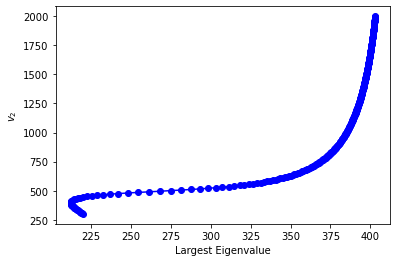

In [37]:
plt.plot(sorted_model_LE, v2, "b-o")
plt.xlabel("Largest Eigenvalue")
plt.ylabel(r"$v_2$")

Text(0, 0.5, '$v_2$')

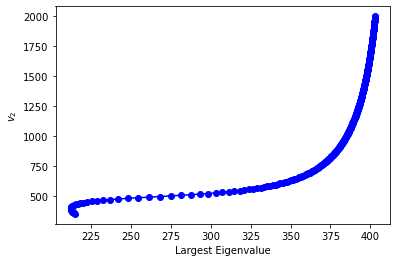

In [38]:
plt.plot(sorted_model_LE[10:], v2[10:], "b-o")
plt.xlabel("Largest Eigenvalue")
plt.ylabel(r"$v_2$")

Text(0, 0.5, '$v_2$')

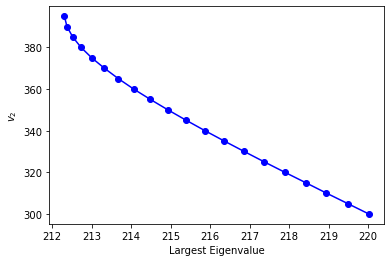

In [39]:
plt.plot(sorted_model_LE[:20],v2[:20], "b-o")
plt.xlabel("Largest Eigenvalue")
plt.ylabel(r"$v_2$")

Text(0, 0.5, '$v_2$')

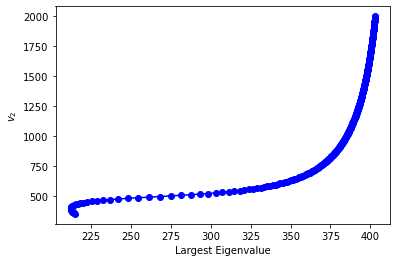

In [40]:
plt.plot(sorted_model_LE[10:],v2[10:], "b-o")
plt.xlabel("Largest Eigenvalue")
plt.ylabel(r"$v_2$")

Text(0, 0.5, '$v_2$')

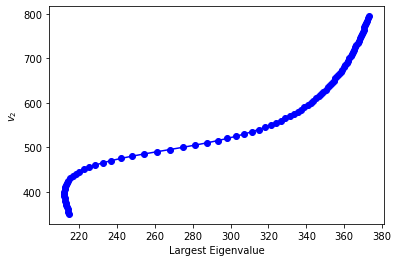

In [41]:
ii = (800-300)/5
ii = int(ii)

plt.plot(sorted_model_LE[10:ii],v2[10:ii], "b-o")
plt.xlabel("Largest Eigenvalue")
plt.ylabel(r"$v_2$")

### Quadratic regression for Weighted Laplacian Graph

In [ ]:
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(sorted_LWG_LE[:,0].reshape(-1, 1))

In [ ]:
lr_lwg_poly = LinearRegression()
lr_lwg_poly.fit(poly_features, v2)

LinearRegression()

In [ ]:
lr_lwg_pred=lr_lwg_poly.predict(poly_features)

Text(0.5, 1.0, 'Quadratic Regression')

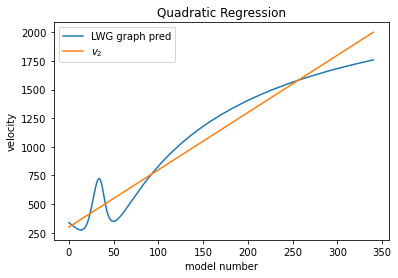

In [ ]:
plt.plot(lr_lwg_pred, label = "LWG graph pred")
plt.plot(v2, label = r"$v_2$")
plt.xlabel("model number")
plt.ylabel("velocity")
plt.legend()
plt.title("Quadratic Regression")
#plt.plot(lr_lwg_poly.predict(poly_features))
#plt.plot(v2)

Text(0.5, 1.0, 'Perc err: Quadratic Regression')

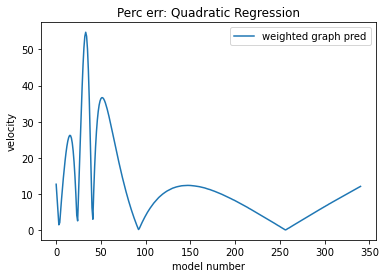

In [ ]:
plt.plot(np.abs((v2 - lr_lwg_pred)/v2)*100, label = "weighted graph pred")
plt.xlabel("model number")
plt.ylabel("velocity")
plt.legend()
plt.title("Perc err: Quadratic Regression")

### Quadratic regression for Weighted Graph

In [57]:
quad_model = PolynomialFeatures(degree=2,include_bias=False)
quad_model_features = quad_model.fit_transform(sorted_model_LE[50:].reshape(-1, 1))

In [58]:
lr_model_quad = LinearRegression()
lr_model_quad.fit(quad_model_features, v2[50:])

LinearRegression()

In [59]:
lr_model_quad_pred = lr_model_quad.predict(quad_model_features)

Text(0.5, 1.0, 'Quadratic Regression')

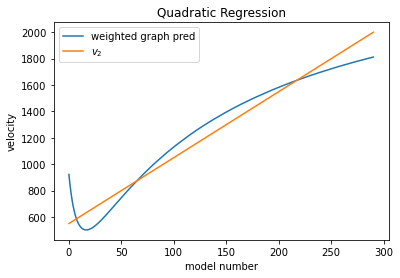

In [60]:
plt.plot(lr_model_quad_pred, label = "weighted graph pred")
plt.plot(v2[50:], label = r"$v_2$")
plt.xlabel("model number")
plt.ylabel("velocity")
plt.legend()
plt.title("Quadratic Regression")

In [61]:
lr_model_quad.coef_

array([[-336.89201571,    0.48029716]])

Text(0.5, 1.0, 'Perc err: Quadratic Regression')

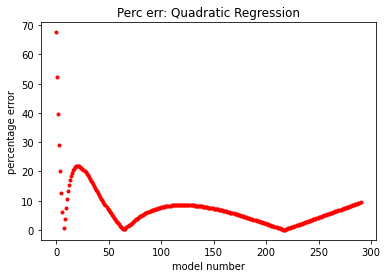

In [62]:
plt.plot(np.abs((v2[50:] - lr_model_quad_pred)/v2[50:])*100, "r.")
plt.xlabel("model number")
plt.ylabel("percentage error")
plt.title("Perc err: Quadratic Regression")

In [63]:
quad_model_features_test = quad_model.fit_transform(sorted_model_LE_test[50:].reshape(-1, 1))

In [64]:
lr_model_quad_test_pred = lr_model_quad.predict(quad_model_features_test)

Text(0.5, 1.0, 'Perc err: quartic Regression')

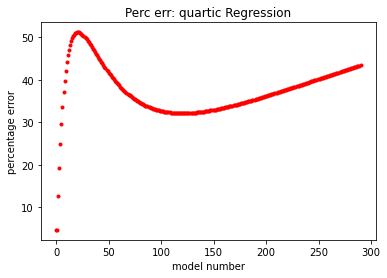

In [65]:
plt.plot(np.abs((v2_test[50:] - lr_model_quad_test_pred)/v2_test[50:])*100, "r.")
plt.xlabel("model number")
plt.ylabel("percentage error")
plt.title("Perc err: quartic Regression")

In [66]:
np.array([[-5.69629507e-02,  1.02152603e-07]])

array([[-5.69629507e-02,  1.02152603e-07]])

### Cubic regression for Weighted Graph

In [67]:
cubic_model = PolynomialFeatures(degree=3,include_bias=False)
cubic_model_features = cubic_model.fit_transform(sorted_model_LE.reshape(-1, 1))

In [68]:
lr_model_cubic = LinearRegression()
lr_model_cubic.fit(cubic_model_features, v2)

LinearRegression()

In [69]:
lr_model_cubic_pred = lr_model_cubic.predict(cubic_model_features)

Text(0.5, 1.0, 'Cubic Regression')

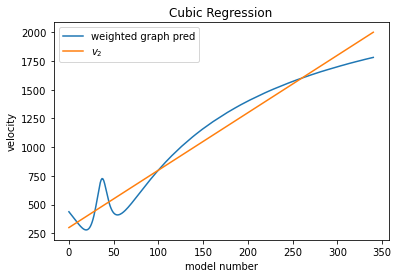

In [70]:
plt.plot(lr_model_cubic_pred, label = "weighted graph pred")
plt.plot(v2, label = r"$v_2$")
plt.xlabel("model number")
plt.ylabel("velocity")
plt.legend()
plt.title("Cubic Regression")

In [71]:
#plt.plot(np.abs(v2 - lr_model_pred), label = "weighted graph pred")
#plt.xlabel("model number")
#plt.ylabel("velocity")
#plt.legend()
#plt.title("Quadratic Regression")

Text(0.5, 1.0, 'Perc err: Quadratic Regression')

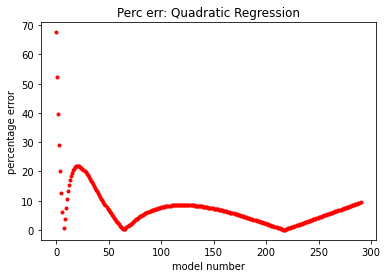

In [72]:
plt.plot(np.abs((v2[50:] - lr_model_quad_pred)/v2[50:])*100, "r.")
plt.xlabel("model number")
plt.ylabel("percentage error")
plt.title("Perc err: Quadratic Regression")

Text(0.5, 1.0, 'Perc err: Cubic Regression')

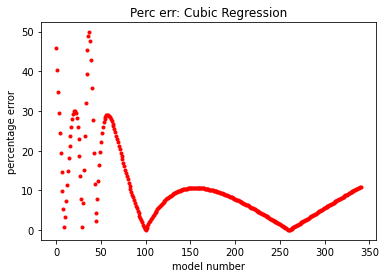

In [73]:
plt.plot(np.abs((v2 - lr_model_cubic_pred)/v2)*100, "r.")
plt.xlabel("model number")
plt.ylabel("percentage error")
plt.title("Perc err: Cubic Regression")

In [74]:
lr_model_cubic.coef_

array([[ 3.75227863e+02, -1.29737180e+00,  1.47057324e-03]])

### Quartic regression for Weighted Graph

In [42]:
s_ind = 50
perc = 10
s_vec = v2[s_ind,0]

model_number = np.linspace(s_ind+1, len(sorted_model_LE), len(sorted_model_LE)-s_ind, dtype=int)
model_ticks = np.linspace(11, len(sorted_model_LE), 10, dtype=int)

velocity_number = v2[s_ind:]
velocity_ticks = velocity_number[np.linspace(0, len(velocity_number)-1, 10, dtype=int)]

In [43]:
#Data = np.concatenate()
velocity_ticks

array([[ 550.],
       [ 710.],
       [ 870.],
       [1030.],
       [1190.],
       [1355.],
       [1515.],
       [1675.],
       [1835.],
       [2000.]])

In [44]:
quartic_model = PolynomialFeatures(degree=4,include_bias=False)
quartic_model_features = quartic_model.fit_transform((sorted_model_LE[s_ind:]).reshape(-1, 1))

In [45]:
lr_model_quartic = LinearRegression()
lr_model_quartic.fit(quartic_model_features, v2[s_ind:])

LinearRegression()

In [46]:
lr_model_quartic_pred = lr_model_quartic.predict(quartic_model_features)

Text(0.5, 1.0, 'quartic Regression')

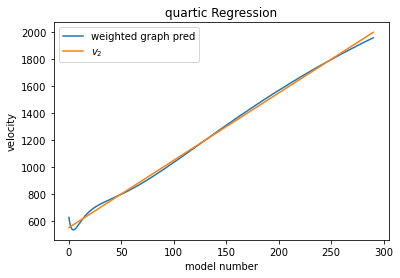

In [47]:
plt.plot(lr_model_quartic_pred, label = "weighted graph pred")
plt.plot(v2[s_ind:], label = r"$v_2$")
plt.xlabel("model number")
plt.ylabel("velocity")
plt.legend()
plt.title("quartic Regression")

Text(0.5, 1.0, '$v_2$ $\\geq$ $v_1$ + 10%$v_1$ = 550.0')

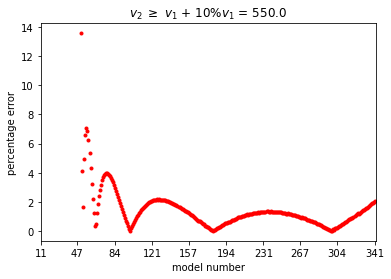

In [48]:
plt.plot(model_number, np.abs((v2[s_ind:] - lr_model_quartic_pred)/v2[s_ind:])*100, "r.") 
plt.xlim(s_ind-1, len(sorted_model_LE)+1)
plt.xticks(model_ticks)
plt.xlabel("model number")
plt.ylabel("percentage error")
#plt.title("Perc err: quartic Regression")
plt.title(r"$v_2$ " + r"$\geq$ " + r"$v_1$ - " + str(perc) + "%" + r"$v_1$ = " + str(s_vec))
plt.title(r"$v_2$ " + r"$\geq$ " + r"$v_1$ + " + str(perc) + "%" + r"$v_1$ = " + str(s_vec))

Text(0.5, 1.0, '$v_2$ $\\geq$ $v_1$ + 10%$v_1$ = 550.0')

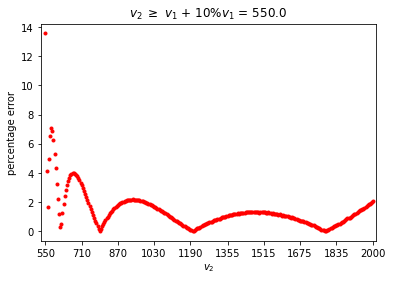

In [64]:
#plt.subplots_adjust(left=0.1, bottom=0.1, right=0.6, top=0.8)
plt.plot(velocity_number, np.abs((v2[s_ind:] - lr_model_quartic_pred)/v2[s_ind:])*100, "r.") 
plt.xlim(velocity_ticks.min()-20, v2.max()+10)
plt.xticks(velocity_ticks)
plt.xlabel(r"$v_2$")
plt.ylabel("percentage error")
#plt.title("Perc err: quartic Regression")
plt.title(r"$v_2$ " + r"$\geq$ " + r"$v_1$ - " + str(perc) + "%" + r"$v_1$ = " + str(s_vec))
plt.title(r"$v_2$ " + r"$\geq$ " + r"$v_1$ + " + str(perc) + "%" + r"$v_1$ = " + str(s_vec))

#### Split data with $v_2 = 500$, into train and test set 

- 70% for training 

- 30% for testing

In [70]:
s_ind = 50
perc = 10
s_vec = v2[s_ind,0]

model_number = np.linspace(s_ind+1, len(sorted_model_LE), len(sorted_model_LE)-s_ind, dtype=int)
model_ticks = np.linspace(11, len(sorted_model_LE), 10, dtype=int)

velocity_number = v2[s_ind:]
velocity_ticks = velocity_number[np.linspace(0, len(velocity_number)-1, 10, dtype=int)]

In [94]:
Data = np.concatenate(((sorted_model_LE[s_ind:]).reshape(-1, 1),v2[s_ind:],(sorted_LWG_LE[s_ind:]).reshape(-1, 1)), axis = 1)

In [98]:
Eig_train, Eig_test, Y_train, Y_test = train_test_split(Data[:,[0,2]], Data[:,1], train_size=0.7, test_size=0.3,random_state=0)

In [100]:
X_train, X_lwg_train = Eig_train[:,0:1],  Eig_train[:,1:2]

In [103]:
X_test, X_lwg_test = Eig_test[:,0:1],  Eig_test[:,1:2]

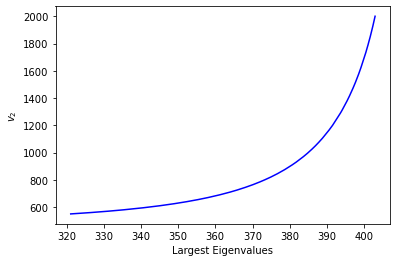

In [121]:
plt.plot(Data[:,0], Data[:,1], "b-") 
plt.xlabel("Largest Eigenvalues")
plt.ylabel(r"$v_2$")
plt.savefig("../../../Manuscripts/Graph-Seismic_Velocity/Figures/v1_500_relation.png")

Text(0, 0.5, '$v_2$')

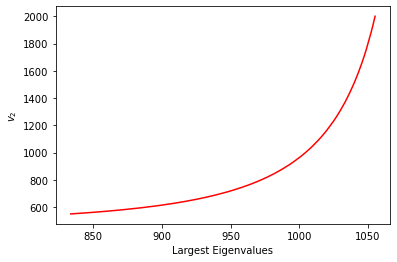

In [122]:
plt.plot(Data[:,2], Data[:,1], "r-") 
plt.xlabel("Largest Eigenvalues")
plt.ylabel(r"$v_2$")

In [74]:
quartic_model = PolynomialFeatures(degree=4,include_bias=False)
quartic_model_features_train = quartic_model.fit_transform(X_train.reshape(-1, 1))
quartic_model_features_test = quartic_model.fit_transform(X_test.reshape(-1, 1))

In [75]:
lr_model_quartic = LinearRegression()
lr_model_quartic.fit(quartic_model_features_train, Y_train.reshape(-1,1))

LinearRegression()

In [76]:
lr_model_quartic_pred_test = lr_model_quartic.predict(quartic_model_features_test)
lr_model_quartic_pred_train = lr_model_quartic.predict(quartic_model_features_train)

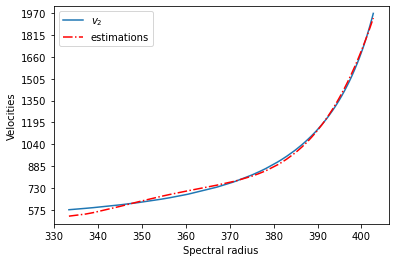

In [77]:
Y_test_sort = np.sort(Y_test)
pred_test_sort = np.sort(lr_model_quartic_pred_test.flatten())
eig_test_sort = np.sort(X_test)
plt.plot(eig_test_sort,Y_test_sort, label = r"$v_2$") 
plt.plot(eig_test_sort,pred_test_sort, "r-.", label = "estimations")

plt.yticks(np.linspace(Y_test_sort.min(), Y_test_sort.max(), 10, dtype = int))
plt.ylim(np.min(Y_test_sort[0]-100), np.max(Y_test_sort[-1]+50))
plt.ylabel("Velocities")
plt.xlabel("Spectral radius")
plt.legend()

#ind_test = np.linspace(0, len(Y_test_sort)-1, 8, dtype=int)
#plt.xlim(s_ind-1, len(sorted_model_LE)+1)
#plt.xticks(model_ticks)
#Y_test_sort[ind_test]
#plt.ylim(np.min(Y_test_sort[0],eig_test_sort[0]), np.max(Y_test_sort[-1],eig_test_sort[-1]))

Text(0, 0.5, 'percentage error')

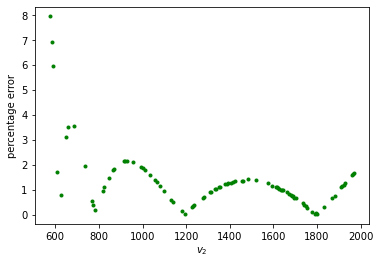

In [78]:
plt.plot(Y_test, np.abs((Y_test - lr_model_quartic_pred_test.flatten())/Y_test)*100, "g.") 
#plt.xlim(s_ind-1, len(sorted_model_LE)+1)
#plt.xticks(model_ticks)
plt.xlabel(r"$v_2$")
plt.ylabel("percentage error")

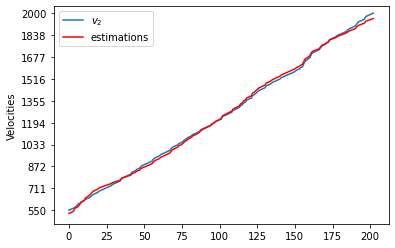

In [86]:
Y_train_sort = np.sort(Y_train)
eig_train_sort = np.sort(lr_model_quartic_pred_train.flatten())
plt.plot(Y_train_sort, label = r"$v_2$") 
plt.plot(eig_train_sort, "r-", label = "estimations")

plt.yticks(np.linspace(Y_train_sort.min(), Y_train_sort.max(), 10, dtype = int))
plt.ylim(np.min(Y_train_sort[0]-100), np.max(Y_train_sort[-1]+50))
plt.ylabel("Velocities")
plt.legend()

Text(0, 0.5, 'percentage residual')

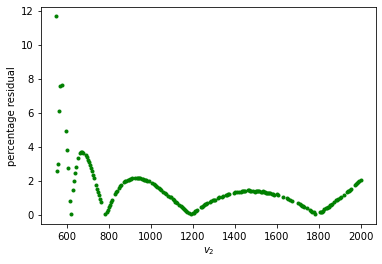

In [87]:
plt.plot(Y_train, np.abs((Y_train - lr_model_quartic_pred_train.flatten())/Y_train)*100, "g.") 
#plt.xlim(s_ind-1, len(sorted_model_LE)+1)
#plt.xticks(model_ticks)
plt.xlabel(r"$v_2$")
plt.ylabel("percentage residual")

In [81]:
len(X_train), len(X_test)

(203, 88)

### Quartic regression for Laplacian Weighted Graph

In [52]:
s_ind_lwg = 50
perc_lwg = 10
s_vec_lwg = v2[s_ind_lwg,0]
sorted_LWG_LE = sorted_LWG_LE[:,0:1]
model_number = np.linspace(s_ind_lwg+1, len(sorted_LWG_LE), len(sorted_LWG_LE)-s_ind_lwg, dtype=int)
#model_ticks = np.linspace(s_ind+1, len(sorted_model_LE), 10, dtype=int)

#model_number = np.linspace(11, len(sorted_model_LE), len(sorted_model_LE)-s_ind, dtype=int)
lwg_ticks = np.linspace(11, len(sorted_LWG_LE), 10, dtype=int)

In [53]:
quartic_LWG = PolynomialFeatures(degree=4,include_bias=False)
quartic_LWG_features = quartic_LWG.fit_transform((sorted_LWG_LE[s_ind_lwg:]).reshape(-1, 1))
#quartic_LWG_features = quartic_LWG.fit_transform((sorted_LWG_LE[s_ind_lwg:]/1000).reshape(-1, 1))

In [54]:
lr_LWG_quartic = LinearRegression()
lr_LWG_quartic.fit(quartic_LWG_features, v2[s_ind_lwg:])

LinearRegression()

In [55]:
lr_LWG_quartic_pred = lr_LWG_quartic.predict(quartic_LWG_features)

Text(0.5, 1.0, 'quartic Regression')

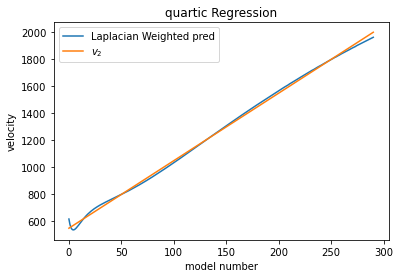

In [56]:
plt.plot(lr_LWG_quartic_pred, label = "Laplacian Weighted pred")
plt.plot(v2[s_ind_lwg:], label = r"$v_2$")
plt.xlabel("model number")
plt.ylabel("velocity")
plt.legend()
plt.title("quartic Regression")

Text(0.5, 1.0, '$v_2$ $\\geq$ $v_1$ + 10%$v_1$ = 550.0')

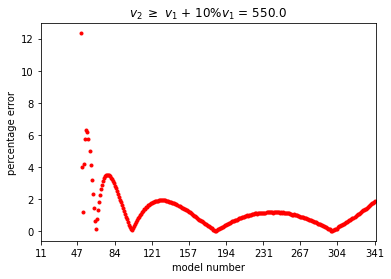

In [57]:
plt.plot(model_number, np.abs((v2[s_ind_lwg:] - lr_LWG_quartic_pred)/v2[s_ind_lwg:])*100, "r.") 
plt.xlim(s_ind_lwg-1, len(sorted_LWG_LE)+1)
plt.xticks(lwg_ticks)
plt.xlabel("model number")
plt.ylabel("percentage error")
#plt.title("Perc err: quartic Regression")
plt.title(r"$v_2$ " + r"$\geq$ " + r"$v_1$ - " + str(perc_lwg) + "%" + r"$v_1$ = " + str(s_vec_lwg))
plt.title(r"$v_2$ " + r"$\geq$ " + r"$v_1$ + " + str(perc_lwg) + "%" + r"$v_1$ = " + str(s_vec_lwg))

Text(0.5, 1.0, '$v_2$ $\\geq$ $v_1$ + 10%$v_1$ = 550.0')

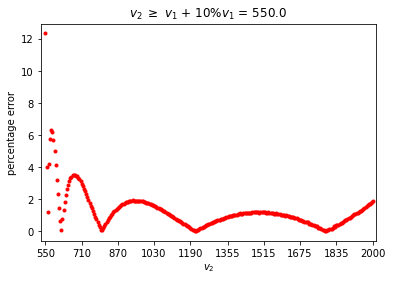

In [68]:
#plt.subplots_adjust(left=0.1, bottom=0.1, right=0.6, top=0.8)
plt.plot(velocity_number, np.abs((v2[s_ind_lwg:] - lr_LWG_quartic_pred)/v2[s_ind_lwg:])*100, "r.") 
plt.xlim(velocity_ticks.min()-20, v2.max()+10)
plt.xticks(velocity_ticks)
plt.xlabel(r"$v_2$")
plt.ylabel("percentage error")
    #plt.title("Perc err: quartic Regression")
plt.title(r"$v_2$ " + r"$\geq$ " + r"$v_1$ - " + str(perc) + "%" + r"$v_1$ = " + str(s_vec))
plt.title(r"$v_2$ " + r"$\geq$ " + r"$v_1$ + " + str(perc) + "%" + r"$v_1$ = " + str(s_vec))

### Predicting the train test data from the Laplacian Weighted graph

In [104]:
#quartic_model = PolynomialFeatures(degree=4,include_bias=False)
lwg_quartic_model_features_train = quartic_LWG.fit_transform(X_lwg_train.reshape(-1, 1))
lwg_quartic_model_features_test = quartic_LWG.fit_transform(X_lwg_test.reshape(-1, 1))

In [105]:
lwg_lr_model_quartic = LinearRegression()
lwg_lr_model_quartic.fit(lwg_quartic_model_features_train, Y_train.reshape(-1,1))

LinearRegression()

In [115]:
lwg_lr_model_quartic_pred_test = lwg_lr_model_quartic.predict(lwg_quartic_model_features_test)
lwg_lr_model_quartic_pred_train = lwg_lr_model_quartic.predict(lwg_quartic_model_features_train)

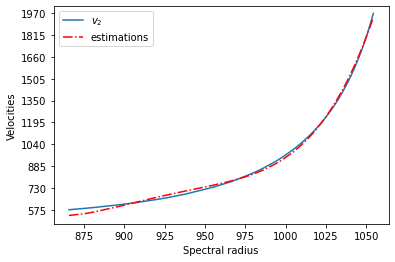

In [116]:
#Y_test_sort = np.sort(Y_test)
#eig_test_sort = np.sort(X_test_sort)

X_lwg_test_sort = np.sort(X_lwg_test.flatten())
lwg_pred_test_sort = np.sort(lwg_lr_model_quartic_pred_test.flatten())

plt.plot(X_lwg_test_sort,Y_test_sort, label = r"$v_2$") 
plt.plot(X_lwg_test_sort,lwg_pred_test_sort, "r-.", label = "estimations")

plt.yticks(np.linspace(Y_test_sort.min(), Y_test_sort.max(), 10, dtype = int))
plt.ylim(np.min(Y_test_sort[0]-100), np.max(Y_test_sort[-1]+50))
plt.ylabel("Velocities")
plt.xlabel("Spectral radius")
plt.legend()

Text(0, 0.5, 'percentage error')

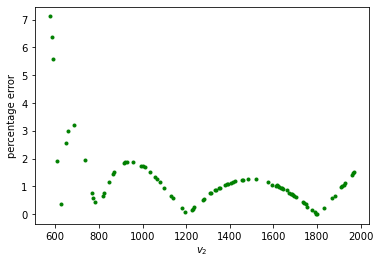

In [117]:
plt.plot(Y_test, np.abs((Y_test - lwg_lr_model_quartic_pred_test.flatten())/Y_test)*100, "g.") 
#plt.xlim(s_ind-1, len(sorted_model_LE)+1)
#plt.xticks(model_ticks)
plt.xlabel(r"$v_2$")
plt.ylabel("percentage error")

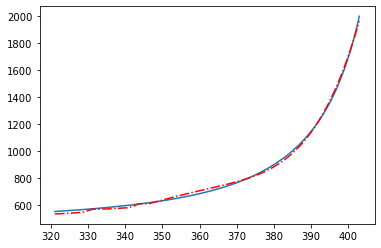

In [118]:
#Y_train_sort = np.sort(Y_train)
lwg_train_sort = np.sort(X_lwg_train.flatten())
lwg_pred_train_sort = np.sort(lwg_lr_model_quartic_pred_train.flatten())

plt.plot(lwg_eig_train_sort, Y_train_sort, label = r"$v_2$") 
plt.plot(lwg_eig_train_sort, lwg_pred_train_sort, "r-.", label = "estimations")

#plt.yticks(np.linspace(Y_train_sort.min(), Y_train_sort.max(), 10, dtype = int))
#plt.ylim(np.min(Y_train_sort[0]-100), np.max(Y_train_sort[-1]+50))
#plt.ylabel("Velocities")
#plt.legend()

Text(0, 0.5, 'percentage residual')

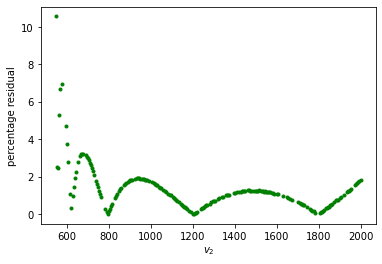

In [119]:
plt.plot(Y_train, np.abs((Y_train - lwg_lr_model_quartic_pred_train.flatten())/Y_train)*100, "g.") 
#plt.xlim(s_ind-1, len(sorted_model_LE)+1)
#plt.xticks(model_ticks)
plt.xlabel(r"$v_2$")
plt.ylabel("percentage residual")

Text(0, 0.5, 'percentage residual')

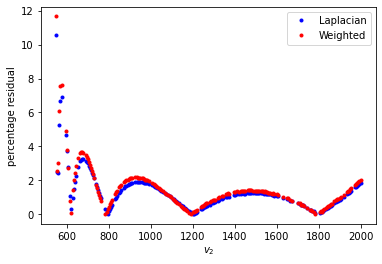

In [127]:
plt.plot(Y_train, np.abs((Y_train - lwg_lr_model_quartic_pred_train.flatten())/Y_train)*100, "b.", label = "Laplacian") 
plt.plot(Y_train, np.abs((Y_train - lr_model_quartic_pred_train.flatten())/Y_train)*100, "r.", label = "Weighted") 
plt.legend()
#plt.xlim(s_ind-1, len(sorted_model_LE)+1)
#plt.xticks(model_ticks)
plt.xlabel(r"$v_2$")
plt.ylabel("percentage residual")

Text(0, 0.5, 'percentage residual')

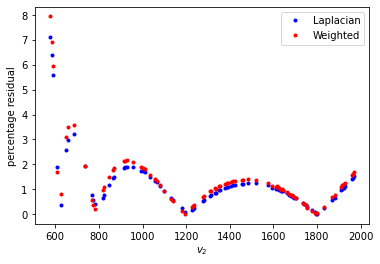

In [129]:
plt.plot(Y_test, np.abs((Y_test - lwg_lr_model_quartic_pred_test.flatten())/Y_test)*100, "b.", label = "Laplacian") 
plt.plot(Y_test, np.abs((Y_test - lr_model_quartic_pred_test.flatten())/Y_test)*100, "r.", label = "Weighted") 
plt.legend()
#plt.xlim(s_ind-1, len(sorted_model_LE)+1)
#plt.xticks(model_ticks)
plt.xlabel(r"$v_2$")
plt.ylabel("percentage residual")

Text(0, 0.5, 'percentage residual')

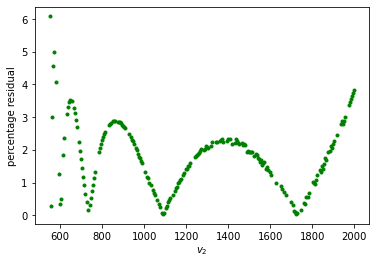

In [120]:
plt.plot(Y_train, np.abs((lr_model_quartic_pred_train.flatten() - lwg_lr_model_quartic_pred_train.flatten())), "g.") 
#plt.xlim(s_ind-1, len(sorted_model_LE)+1)
#plt.xticks(model_ticks)
plt.xlabel(r"$v_2$")
plt.ylabel("percentage residual")

### Trying $v_1 = 800$ dataset, as a test data :) 

In [521]:
quartic_model_features_test = quartic_model.fit_transform((sorted_model_LE_test[50:]/1000).reshape(-1, 1))
lr_model_quartic_test_pred = lr_model_quartic.predict(quartic_model_features_test)

Text(0.5, 1.0, 'Perc err: quartic Regression')

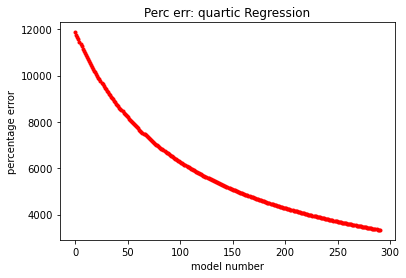

In [522]:
plt.plot(np.abs((v2_test[50:] - lr_model_quartic_test_pred)/v2_test[50:])*100, "r.")
plt.xlabel("model number")
plt.ylabel("percentage error")
plt.title("Perc err: quartic Regression")

### Quartic regression model with $v_1 = 800$ dataset

In [553]:
s_ind_1 = 60
perc_1 = 20
s_vec_1 = v2_test[s_ind_1,0]
model_number_1 = np.linspace(s_ind_1+1, len(sorted_model_LE_test), len(sorted_model_LE_test)-s_ind_1, dtype=int)
#model_ticks = np.linspace(s_ind+1, len(sorted_model_LE), 10, dtype=int)

#model_number = np.linspace(11, len(sorted_model_LE), len(sorted_model_LE)-s_ind, dtype=int)
model_ticks_1 = np.linspace(11, len(sorted_model_LE_test), 10, dtype=int)

In [554]:
quartic_model_1 = PolynomialFeatures(degree=4,include_bias=False)
quartic_model_features_1 = quartic_model_1.fit_transform((sorted_model_LE_test[s_ind_1:]/1000).reshape(-1, 1))

In [555]:
lr_model_quartic_1 = LinearRegression()
lr_model_quartic_1.fit(quartic_model_features_1, v2_test[s_ind_1:])

LinearRegression()

In [556]:
lr_model_quartic_pred_1 = lr_model_quartic_1.predict(quartic_model_features_1)

Text(0.5, 1.0, 'quartic Regression')

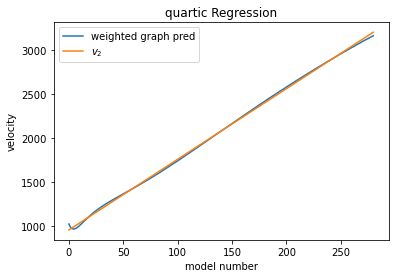

In [557]:
plt.plot(lr_model_quartic_pred_1, label = "weighted graph pred")
plt.plot(v2_test[s_ind_1:], label = r"$v_2$")
plt.xlabel("model number")
plt.ylabel("velocity")
plt.legend()
plt.title("quartic Regression")

Text(0.5, 1.0, '$v_2$ $\\geq$ $v_1$ + 20%$v_1$ = 960.0')

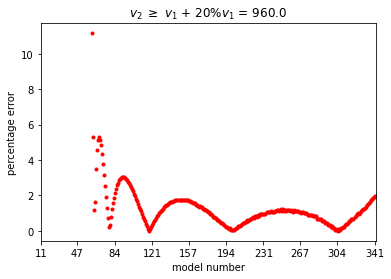

In [558]:
plt.plot(model_number_1, np.abs((v2_test[s_ind_1:] - lr_model_quartic_pred_1)/v2[s_ind_1:])*100, "r.") 
plt.xlim(s_ind-1, len(sorted_model_LE)+1)
plt.xticks(lwg_ticks)
plt.xlabel("model number")
plt.ylabel("percentage error")
#plt.title("Perc err: quartic Regression")
#plt.title(r"$v_2$ " + r"$\geq$ " + r"$v_1$ - " + str(perc_1) + "%" + r"$v_1$ = " + str(s_vec_1))

plt.title(r"$v_2$ " + r"$\geq$ " + r"$v_1$ + " + str(perc_1) + "%" + r"$v_1$ = " + str(s_vec_1))

In [30]:
np.max(np.array([1,2,3,4,5,6,7]),)

array([1, 2, 3, 4, 5, 6, 7])